# Introduction to Descriptive Statistics
Adapted from *COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll cover 
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernouilli, Binomial, Normal)

## Variable types
- **discrete variables**: values are discrete (e.g., year born, T/F)
- **continuous variables**: values are real numbers (e.g., length)

## Levels of measurement
- **Categorical**: Unordered variables 
- **Ordinal**: There is an ordering but no implication of equal distance between the different points of the scale. 
- **Interval**: There are equal differences between successive points on the scale but the position of zero is arbitrary. 
- **Ratio**: The relative magnitudes of scores and the differences between them matter. The position of zero is fixed. 

## Categorical variables
Unordered variables 

Examples: 
- Survey responses: sex (M/F), true or false (T/F), yes or no (Y/N) 
- size: S/M/L/XL 
- color: red, blue, green, etc.


## Ordinal Variables
There is an ordering but no implication of equal distance between the different points of the scale. 


Examples:
- educational level (high school, some college, degree, graduate…) 
- on Likert scale of 1 to 5, how satisfied are you with your instructor? 
- social class (lower, middle, upper) 

<img src="OrdinalVariables.png"/>


## Interval Variables 
There are equal differences between successive points on the scale but the position of zero is arbitrary.

Examples:
- Measurement of temperature using the Celsius or Fahrenheit scales.
- Longitude 

![Thermometers](Thermometer_CF.png)


## Ratio Variables
The relative magnitudes of scores and the differences between them matter. The position of zero is fixed.

Examples:
- Absolute measure of temperature (Kelvin scale) 
- Age
- Weight
- Length

<img src="Ruler.png" width="50%"  alt="https://commons.wikimedia.org/wiki/File:Metre_pliant_500px.png"/>


## Quiz!

For each of the following variables, what is the variable type (discrete vs. continuous) and level of measurement (categorical, ordinal, interval, or ratio)?

1. Lattitude
2. Olympic 50 meter race times
3. Olympic floor gymnastics score
4. College major
6. Amazon rating for a product

Can you think of another example of an interval variable? 



<img src="purity.png" width="90%"  alt="https://xkcd.com/435/"/>


## Descriptive Statistics

The goal is to describe a dataset with a small number of statistics or figures  

Suppose we are given a sample, $x_1, x_2, \ldots, x_n$ of real values 

Some *descriptive statitsics* for this data are the min, max, median, and mean, $\frac{1}{n} \sum_{i=1}^n x_i$

How do we compute these using python? 


In [1]:
# First import python packages
# /usr/local/bin/pip3 install numpy matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Alta monthly average snowfall, October - April
compiled using data from 1980 to 2014 <br>
https://www.alta.com/conditions/weather-observations/snowfall-history

In [2]:
Alta_avg_month_snow = [28.50,76.77,92.00,95.40,90.85,99.66,80.00]

# this is a list of floats
print(type(Alta_avg_month_snow))
print(type(Alta_avg_month_snow[0]))

<class 'list'>
<class 'float'>


In [3]:
# how many months data do we have?
len(Alta_avg_month_snow)

7

In [4]:
print(sum(Alta_avg_month_snow)/len(Alta_avg_month_snow))
np.mean(Alta_avg_month_snow)

80.4542857142857


80.4542857142857

Numpy has methods for many basic statistics and other functions that work on "list-like" things

In [5]:
# compute the min and max
np.min(Alta_avg_month_snow),np.max(Alta_avg_month_snow)

(28.5, 99.66)

In [6]:
# what month do these correspond to? 
imin = np.argmin(Alta_avg_month_snow)
imax = np.argmax(Alta_avg_month_snow)
months = ['Oct','Nov','Dec','Jan','Feb','March','Apr']
print(months[imin], months[imax])
print(Alta_avg_month_snow[imin], Alta_avg_month_snow[imax])

Oct March
28.5 99.66


In [7]:
# compute the mean
np.mean(Alta_avg_month_snow)

80.4542857142857

In [8]:
# compute the median
np.median(Alta_avg_month_snow)

90.85

## Data from the 1994 census

import data from the following dataset <br>
https://archive.ics.uci.edu/ml/datasets/Adult

In [9]:
# use pandas to import a table of data from a website
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=",", 
                  names=("age", "type_employer", "fnlwgt", "education", "education_num", "marital", 
                         "occupation", "relationship", "race","sex","capital_gain", "capital_loss", 
                         "hr_per_week","country", "income"))
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
type(data["age"])

pandas.core.series.Series

In [12]:
# export a list containing ages of people in 1994 Census
ages = data["age"].tolist()
type(ages)

list

In [13]:
print(len(ages))
print(np.min(ages))
print(np.max(ages))
print(np.mean(ages))
print(np.median(ages))

32561
17
90
38.58164675532078
37.0


In [14]:
print(len(data["age"]))
print(np.min(data["age"]))
print(np.max(data["age"]))
print(np.mean(data["age"]))
print(np.median(data["age"]))

32561
17
90
38.58164675532078
37.0


# Quantiles 
Quantiles describe what percentage of the observations in a sample have smaller value


In [15]:
np.percentile(ages,25), np.percentile(ages,75)

(28.0, 48.0)

For this data, 25% of the people are under 28 years old

The middle 50% of the data (the data between the 25% and 75% quantiles) is between 28 and 48 years old 

**Question**: how do I read off quantiles from a histogram? 

# Variance and Standard Deviation

Variance and standard deviation quantify the amount of variation or dispersion of a set of data values.

Mean, $\mu = \frac{1}{n} \sum_{i = 1}^n x_i$ <br>
Variance $= \sigma^2   = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu)^2$ <br>
Std. dev. $= \sigma$

The variance can also be computed by the "mean of x-squared" - $\mu^2$


In [16]:
print(np.var(ages))
print(np.std(ages))
print(np.std(ages)**2)

186.05568600783081
13.640223092304275
186.05568600783081


In terms of the histogram,...
<img src="SmallLargeStandDev.png" width="50%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">



## Covariance and Correlation
Covariance and correlation measure of how much two variables change together.

$cov(x,y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)$ 

$\mu_x$ is mean of $x_1,x_2,\ldots,x_n$ <br>
$\mu_y$ is mean of $y_1,y_2,\ldots,y_n$

$corr(x,y) = \frac{cov(X,Y)}{\sigma_x \sigma_y}$

$\sigma_x$ is std. dev. of $x_1,x_2,\ldots,x_n$ <br>
$\sigma_y$ is std. dev. of $y_1,y_2,\ldots,y_n$

Correlations for various pairs of variables:
<img src="Correlation_examples2.svg" width="90%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">





## Correlation vs Causation

<img src="correlation.png" width="100%"  alt="https://xkcd.com/552/">




## Spurious Correlations I (www.tylervigen.com)

<img src="Conf1.png" width="100%"  alt="www.tylervigen.com">



## Spurious Correlations II (www.tylervigen.com)

<img src="Conf2.png" width="100%" alt="www.tylervigen.com">


## Confounding: example

Suppose we are given city statistics covering a four-month summer period, and observe that swimming pool deaths tend to increase on days when more ice cream is sold. 

Should we conclude that ice cream is the killer? 

## Confounding: example cont.

No! 

As astute analysts, we identify average daily temperature as a confounding variable: on hotter days, people are more likely to both buy ice cream and visit swimming pools. 

Regression methods can be used to statistically control for this confounding variable, eliminating the direct relationship between ice cream sales and swimming pool deaths.

<br> <br> <br> <br> 
source: doi:10.1371/journal.pone.0152719 


## Descriptive vs. Inferential Statistics 

Descriptive statistics quantitatively describe or summarize features of a dataset. 

Inferential statistics attempts to learn about the population from which the data was sampled. 

**Example**: The week before a US presidential election, it is not possible to ask every voting person who they intend to vote for. Instead, a relatively small number of individuals are surveyed. The *hope* is that we can determine the population's preferred candidate from the surveyed results. 

Often, we will model the population as a *probability distribution*. 

*Inferential statistics* is deducing properties of an underlying probability distribution from sampled data. 


## Random Variables

A Random variable is a variable whose value is one of the possible outcomes of a random event.  For example, a random variable representing a die roll has possible values 1-6.  A random variable has an associated "probability distribution" which describes the probability of the variable taking on a particular value.  For the die, the probability distribution is basically: `[1 : 1/6, 2: 1/6, 3: 1/6, ... ]` meaning each outcome is equally likely.  

Random variables can be either discrete or continuous.  A die is an example of a discrete random variable.  A continuous random variable could represent the angle of a spinner on a board game (assuming we care about the angle it lands on rather than whether it lands on "right foot green" or "left hand blue").  Discrete random variables are a bit more intuitive to think about since we can enumerate all the possibiliities, but the math for analyzing them can be a bit more cumbersome.  Continuous RVs are a little bit weird to think about, but we can manipulate them quite nicely with fun, basic calculus!  

As an example, what's the probability that my random variable for the spinner give me a 30 degree angle?  0!  The probability of any single continuous value is 0, because there are an infinite number of possibilities (when we deal with floating point math, things aren't exactly 0, but are incredibly small!).  For continuous RVs, we have to think about the probablitiy of our value falling within a range (between 30 and 45 degrees) to get something finite.

What do we do with a random variable?  We might take samples (roll the die a few times and collect the resulting values), or we might use the associated probabilitiy distribution to perform some analysis/computation.

## Bernoulli Distribution

The Bernoulli distribution, named after Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 (success) with probability $p$ and the value 0 (failure) with probability $q=1-p$. 

The Bernoulli distribution with $p=0.5$ (implying $q=0.5$) describes a 'fair' coin toss where 1 and 0  represent "heads" and "tails", respectively. If the coin is unfair, then we would have that $p\neq 0.5$.

We can use python to sample from the Bernoulli probability distribution. 

In [17]:
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm

In [18]:
n = 1000;
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(coin_flips)

[1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 1 0 0 1 0 0 1 0 0 

How many heads did we get? We just count the number of 1's. 

In [19]:
print(sum(coin_flips))
print(sum(coin_flips)/n)

520
0.52


What if we flip the coin more times? 

In [20]:
n = 1000000
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(sum(coin_flips)/n)

0.500442


Some facts about Bernoulli variables: 
* mean is p
* variance is p(1-p)

## Binomial distribution

The binomial distribution, with parameters $n$ and $p$, is a **discrete** probability distribution ``summarizing'' the outcome of $n$ Bernoulli random variables. For simplicity, take $p=0.5$ so that the Bernoulli distribution describes the outcome of a coin. For each flip, the probability of heads is $p$ (so the probability of tails is $q=1-p$). But we don't keep track of the individual flips. We only keep track of how many heads/tails there were in total. So, the binomial distribution can be thought of as summarizing a bunch of (independent) Bernoulli random variables. 

The following code is equivalent to flipping a fair (p=0.5) coin n=10 times and counting the number of heads and then repeating this process 1,000,000 times. 

In [21]:
p = 0.5
n = 100
bin_vars = binom.rvs(n=n,p=p,size=100000)
print(bin_vars[:100])

[42 53 59 59 48 47 50 57 50 51 46 54 49 41 50 46 49 51 43 48 47 57 46 51
 49 59 59 52 67 51 44 51 50 50 45 52 41 40 53 45 47 58 48 50 48 47 50 55
 49 45 42 40 50 60 63 57 50 40 43 52 48 56 49 57 38 54 50 51 50 47 47 56
 52 52 45 51 49 46 53 51 64 50 44 56 42 47 49 49 55 48 55 50 59 54 54 43
 52 52 44 49]


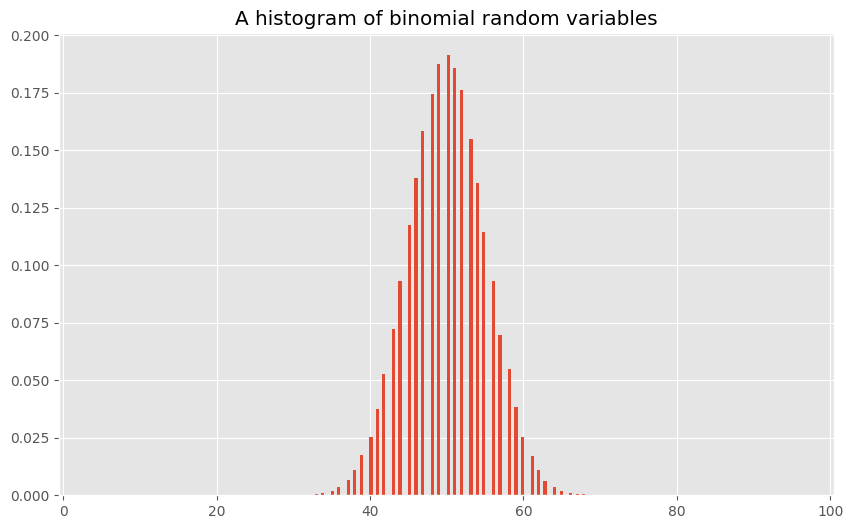

In [22]:
import matplotlib.pyplot as plt

#bins=np.arange(12)-.5
plt.hist(bin_vars, bins = 100,density=True) #density argument makes the y axis probability, not total count
plt.title("A histogram of binomial random variables")
plt.xlim([-0.5,n + .5])
plt.show()

Some facts about the binomial distribution: 
* The mean is $np$
* The variance is $np(1-p)$

## Discrete random variables and probability mass functions 

The Binomial and Bernoulli random variables are examples of *discrete random variables* since they can take only discrete values. A Bernoulli random variable can take values $0$ or $1$. A binomial random variable  can only take values 
$$
0,1,\ldots, n. 
$$
One can compute the probability that the variable takes each value. This is called the *probability mass function*. 
For a Bernoulli random variable, the probability mass function is given by 
$$
f(k) = \begin{cases} p & k=1 \\ 1-p & k = 0 \end{cases}
$$
For a binomial random variable, the probability mass function is given by 
$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}.
$$
Here, $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to arrange the
$k$ heads among the $n$ flips. For a fair coin, we have $p=0.5$ and $f(k) = \binom{n}{k} \frac{1}{2^n}$. This is the number of ways to arrange $k$ heads among $n$ outcomes divided by the total number of outcomes. 

So basically the PMF is a function takes a possible outcome and returns the probability of sampling that outcome

The probability mass function can be plotted using the matplotlib library as follows.

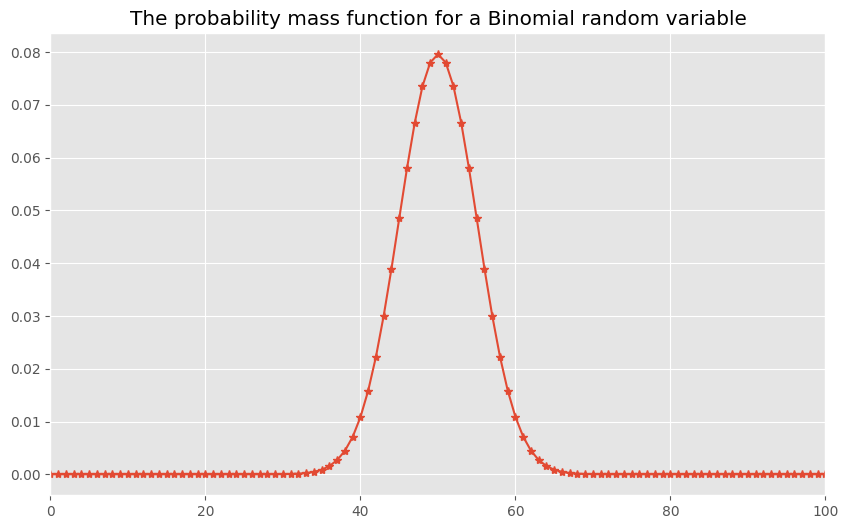

In [23]:
import numpy as np 

f = lambda k: binom.pmf(k, n=n,p=p)

x = np.arange(n+1);
plt.plot(x, f(x),'*-')
plt.title("The probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

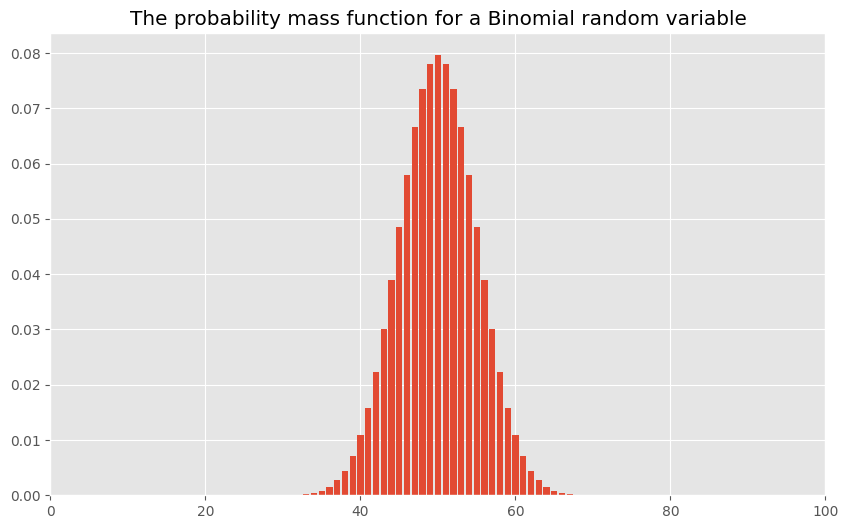

In [24]:
f = lambda k: binom.pmf(k, n=n,p=p)

x = np.arange(n+1);
plt.bar(x, f(x))
plt.title("The probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

Observe that the probability mass function looks very much like the histogram plot! (not a coincidence) 

Question: is this a good way of visualizing a PMF?


## Concept check

**Question**: what is a discrete random variable? 

A *discrete random variable (r.v.)* is an abstraction of a coin or die. It can take on a *discrete* set of possible different values, each with a preassigned probability. We saw two examples of discrete random variables: Bernoulli and binomial.  A Bernoulli r.v. takes value $1$ with probability $p$ and $0$ with probability $1-p$. A binomial r.v. takes values $0,1,\ldots,n$, with a given probability. The probabilities are given by the probability mass function. This function looks just like a histogram if you were to sample a large number of random variables. 

You can use the same descriptive statistics to describe a discrete random value (min, max, mean, variance, etc..).

**Quiz**: what is the random variable that describes a fair die? the sum of two fair dice? 

## Normal (Gaussian) distribution 

Roughly speaking, normal (that's their name, we don't use normal as a synonym for typical) random variables are described by a "bell curve".  The curve is centered at the mean, $\mu$, and has width controlled by the standard deviation, $\sigma$. This is one of the most popular distributions in a huge variety of applications.  It has a simple formula which supports lots of algebraic/calculus manipulations, and is a good model for lots of real world phenomena.  It can be derived by looking at what happens when you add up many independent random variables (imagine a binomial distribution with very large n).

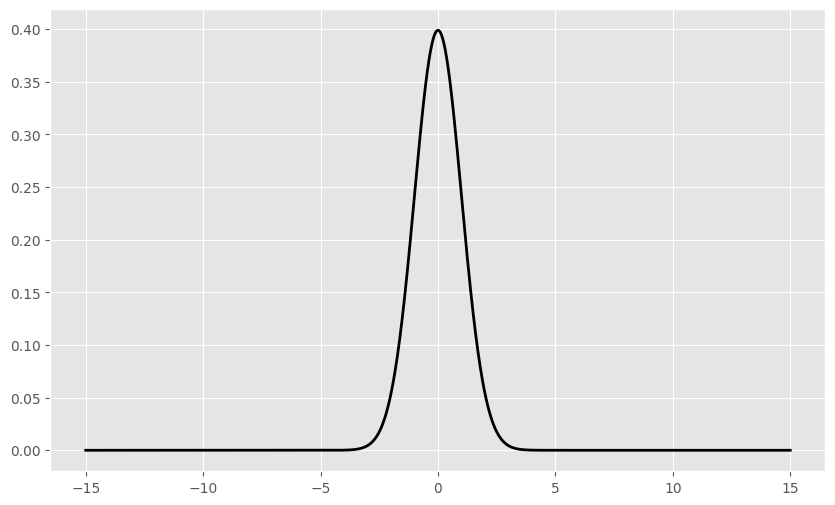

In [25]:
mu = 0 # mean
sigma = 1 # standard deviation 
#x = np.arange(mu-4*sigma,mu+4*sigma,0.001);
xs = np.arange(-15, 15, 0.001);
pdf = norm.pdf(xs ,loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * sc.sqrt(2 * sc.pi)) * sc.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(xs, pdf, linewidth=2, color='k')
plt.show()

## Continuous random variables and probability density functions 

A normal random variable is an example of a *continuous* random variable. A normal random variable can take any real value, but some numbers are more likely than others. More formally, we say that the *probability density function (PDF)* for the normal (Gaussian) distribution is
$$
f(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },
$$
where $\mu$ is the mean and $\sigma$ is the variance. What this means is that the probability that a normal random variable will take values in the interval $[a,b]$ is given by 
$$
\int_a^b f(x) dx.
$$
This is just the area under the curve for this interval. For $a=\mu-\sigma$ and $b = \mu+\sigma$, we plot this below.

ValueError: x and y must have same first dimension, but have shapes (101,) and (30000,)

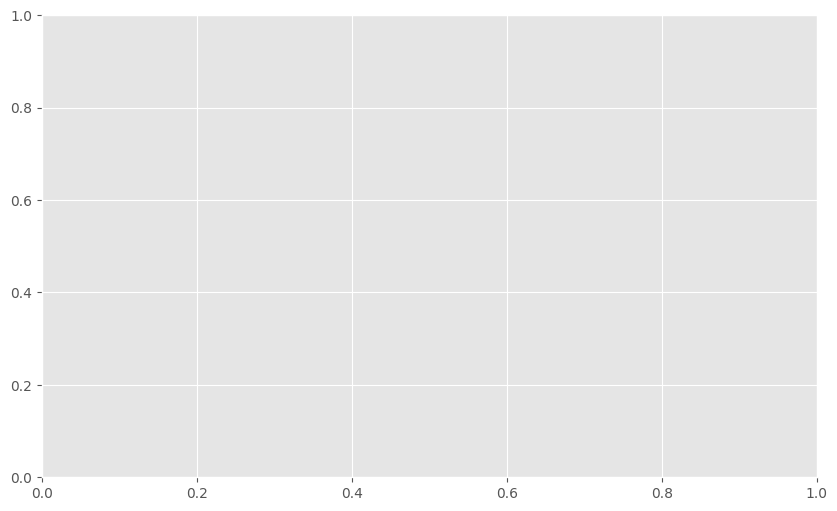

In [26]:
plt.plot(x, pdf, linewidth=2, color='k')
x2 = np.arange(mu-sigma,mu+sigma,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='red', alpha=0.5)
plt.show()

One can check that 
$$
\int_{-\infty}^\infty f(x) dx = 1
$$
which just means that the probability that the random variable takes value between $-\infty$ and $\infty$ is one. 

This integral can be computed using the *cumulative distribution function* (CDF)
$$
F(x) = \int_{-\infty}^x f(x) dx.
$$
We have that 
$$
\int_a^b f(x) dx = F(b) - F(a)
$$


In [ ]:
norm.cdf(mu+sigma, loc=mu, scale=sigma) - norm.cdf(mu-sigma, loc=mu, scale=sigma) 

0.6826894921370859

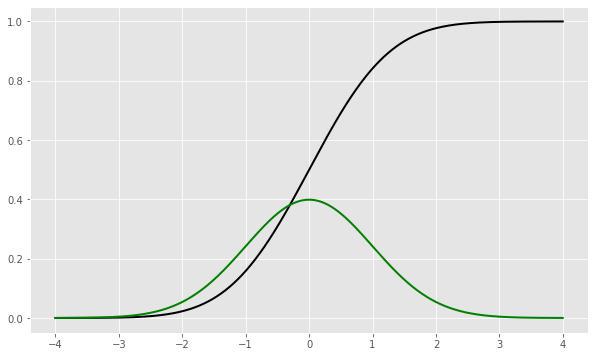

In [ ]:
mu = 0 # mean
sigma = 1 # standard deviation 
x = np.arange(mu-4*sigma,mu+4*sigma,0.001);
cdf = norm.cdf(x,loc=mu, scale=sigma)
pdf = norm.pdf(x, loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * sc.sqrt(2 * sc.pi)) * sc.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(x, cdf, linewidth=2, color='k')
plt.plot(x, pdf, linewidth=2, color="g")
plt.show()

This means that 68% of the time, this normal random variable will have values between $\mu-\sigma$ and $\mu+\sigma$. 

You used to have to look these values up in a table! 

Let's see what it looks like if we sample 1,000,000 normal random variables and then plot a histogram. 

[ 0.07006843 -0.57462954 -0.65410144 -0.08193022 -0.21927125 -0.07080499
  0.45738847 -0.81777428 -0.21413519  0.18504388 -1.24148056 -0.721503
  0.43644765  0.53682395  0.40414518  1.26927395  1.68972239  0.0183539
 -1.87668651  1.39111251  1.19508967  0.40140998 -1.19770175 -0.75757813
 -0.65919715  0.1611788   0.7832779  -0.73835549 -0.25172714 -0.30865052
 -0.68110762 -0.58943529 -1.0660315  -1.13123828  0.70637604 -1.08723991
 -0.49393522  1.93093905 -0.78578219 -1.38112522 -1.08315561  1.48041915
 -0.94754217  0.49939098 -1.86091055 -0.17034534 -0.87515267  0.14918525
 -1.21557601  0.63819137  0.29005935  0.19876734 -1.3121042  -0.39269137
 -0.21620183  0.04559738  0.18470553  1.62123912  0.58792747 -0.70397252
 -2.08564542 -1.98297736 -0.428418   -1.9775247   0.1049809  -0.46621138
  0.38989327 -1.48862461 -1.67120937  0.24627987 -1.40628885 -0.30777529
 -0.84994398  1.42291893  2.51625663  0.18618875 -1.74191915  0.30155528
 -1.20261081  0.85004884  1.76246246  0.04795611  0.19

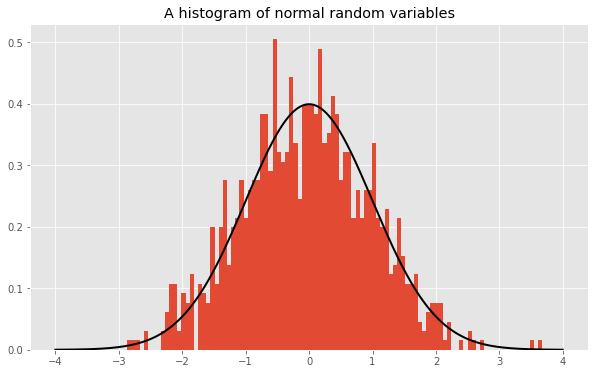

In [ ]:
norm_vars = norm.rvs(loc=mu,scale=sigma,size=1000)
print(norm_vars[:100])

plt.hist(norm_vars, bins=100,density=True)
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("A histogram of normal random variables")
plt.show()

The histogram of the sampled variables looks just like the probability distribution function!

## The Poisson Distribution
The Poisson distribution takes the average rate of an event ocurring as a parameter ($\lambda$), and measures the probability of seeing $k$ of those events in an interval of time.  For example, if there are an average of 1.5 home runs per game in baseball, the poisson distribution tells you the probability of seeing 0, 1, 2, 3, ... homeruns in a given game.  

Note, this is a **discrete** rv, but it comes from a set of continuous parameters.  You can sort of think of it as a way to turn a continuous rate (1.5 homeruns per game) into the probability of a discrete set of outcomes.

For the baseball example, $\lambda = 1.5$ homers per game.  The probability of seeing $k$ homeruns is

$P(k)$ = Poission($k, \lambda$) = $e^{-\lambda}\frac{\lambda^k}{k!}$


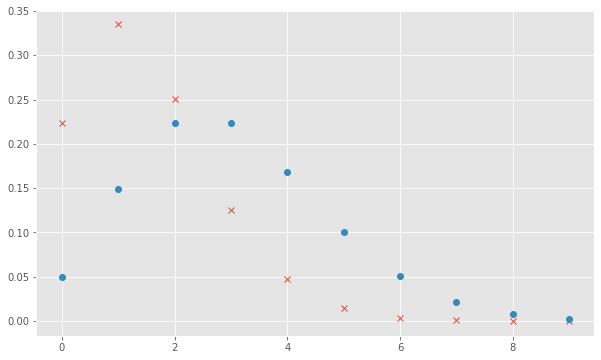

In [ ]:
from scipy.stats import poisson
plt.plot(poisson.pmf(np.arange(10), mu=1.5), 'x') # 1.5 HR's per game
plt.plot(poisson.pmf(np.arange(10), mu=3), 'o') # 3 HR's per game



|        | Discrete           | Continuous  |
| ------------- |-------------| -----|
| comparing likelihood of outcome     | probability mass function.  p(outcome == possibility) | probability density function $$\int_a^b pdf(x) = $$ probability of outcome between a and b|
| cumulative likelihood: $$p(outcome <= somePossibility)$$| cumulative mass function:  $$\sum_{outcomes <= sumePossibility} \text{pmf}(outcome)$$ | cumulative density function: $$\int_{-\inf}^{outcome} \text{pdf}(x)$$ |


For both, probability of an outcome between 2 values is cmf/cdf(upper) - cmf/cdf(lower)


# Concept recap
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernouilli, Binomial, Normal)


## Looking ahead:  Hypothesis testing